In [1]:
import pandas as pd

In [2]:
# 1. Veri analizi ve veri ön işleme

In [3]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
#df["CRIM"] = df["CRIM"].fillna(df["CRIM"].mean())
df = df.fillna(df.mean()) #Tüm satırlardaki boş alanları o sütunun ortalaması ile doldurur.

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
!pip install scikit-learn

In [9]:
# Eğer ki denetimli öğrenme yapıyor isek veriyi "etiket-diğerleri" şeklinde bölmeliyiz.
X = df.drop(columns=["MEDV"]) #Girdi matrix'i
y = df["MEDV"] #Çıktı vektörü

In [10]:
X.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98


In [12]:
y[0]

np.float64(24.0)

In [13]:
X.shape

(506, 13)

In [14]:
#Train test split
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
# Random State (Seed)

In [49]:
X_train.shape, X_test.shape

((455, 13), (51, 13))

In [50]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
281,0.03705,20.0,3.33,0.0,0.4429,6.968,68.518519,5.2447,5,216,14.9,392.23,4.59
22,1.23247,0.0,8.14,0.0,0.5380,6.142,91.700000,3.9769,4,307,21.0,396.90,18.72
101,0.11432,0.0,8.56,0.0,0.5200,6.781,71.300000,2.8561,5,384,20.9,395.58,7.67
268,0.54050,20.0,3.97,0.0,0.5750,7.470,52.600000,2.8720,5,264,13.0,390.30,3.16
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.900000,3.9917,24,666,20.2,388.62,10.58


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
# MAE => Ortalama mutlak sapma payı

mae = mean_absolute_error(y_test, y_pred)
mae
# MSE => 

2.7375779927873065

In [56]:
# MSE => Ortalama sapma değerlerinin karesi alınmış hali
mse = mean_squared_error(y_test, y_pred)
mse

14.537383761304127

In [ ]:
# MSE => Daha büyük sapmaları daha çok cezalandırmak.
# Değer 10
# İlk tahmin 8 -> 2 birim -> 4 birim 
# İkinci tahmin 25 -> 15 birim -> 225 birim

In [57]:
import matplotlib.pyplot as plt

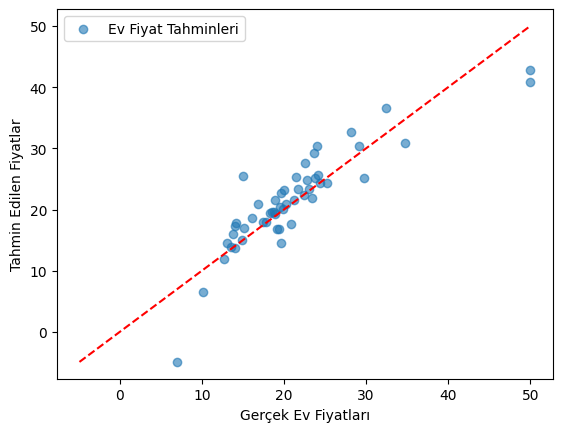

In [63]:
plt.scatter(y_test, y_pred, label="Ev Fiyat Tahminleri", alpha=0.6)
plt.xlabel("Gerçek Ev Fiyatları")
plt.ylabel("Tahmin Edilen Fiyatlar")


min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val],[min_val,max_val], color="red", linestyle="--")

plt.legend()
plt.show()